In [2]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import branca

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame



plotsize = (15,6)


In [10]:
data_g312 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.12.", skiprows = 24, usecols = "B:O", header = 0, nrows = 5)

data_g312.rename({"Concepto": 'KPI',
                 2023 : '2023',
                '2024*' : '2024',
                '2025*' : '2025',
                '2026*' : '2026',
                '2027*' : '2027',
                '2028*' : '2028',
                '2029*' : '2029',
                '2030*' : '2030',
                '2031*' : '2031',
                '2032*' : '2032',
                '2033*' : '2033',
                '2034*' : '2034',
                '2035*' : '2035'}, axis = 1, inplace = True)

print(data_g312)

                         KPI  2023  2024  2025  2026  2027  2028  2029  2030  \
0                        CNG  -4.3  -5.6  -5.1  -4.3  -3.6  -3.2  -2.9  -2.8   
1  Rest of the Central Level   0.5   0.7   0.4   0.7   0.2   0.2   0.2   0.2   
2         Regional and Local   0.1   0.0  -0.1  -0.1  -0.2   0.1  -0.1  -0.2   
3            Social Security   0.9   0.0   0.3   0.3   0.3   0.3   0.3   0.4   
4         General Government  -2.7  -4.9  -4.6  -3.5  -3.3  -2.6  -2.4  -2.5   

   2031  2032  2033  2034  2035  
0  -2.9  -2.9  -2.9  -3.0  -2.9  
1   0.2   0.2   0.2   0.2   0.2  
2  -0.3   0.1   0.0  -0.2  -0.3  
3   0.4   0.4   0.4   0.4   0.4  
4  -2.6  -2.2  -2.3  -2.5  -2.5  


In [11]:
data_g312_graph = pd.melt(data_g312, id_vars = ["KPI"], value_vars = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g312_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g312_graph

,KPI,Year,% GDP
0,CNG,2023,-4.3
1,Rest of the Central Level,2023,0.5
2,Regional and Local,2023,0.1
3,Social Security,2023,0.9
4,General Government,2023,-2.7
...,...,...,...
60,CNG,2035,-2.9
61,Rest of the Central Level,2035,0.2
62,Regional and Local,2035,-0.3
63,Social Security,2035,0.4


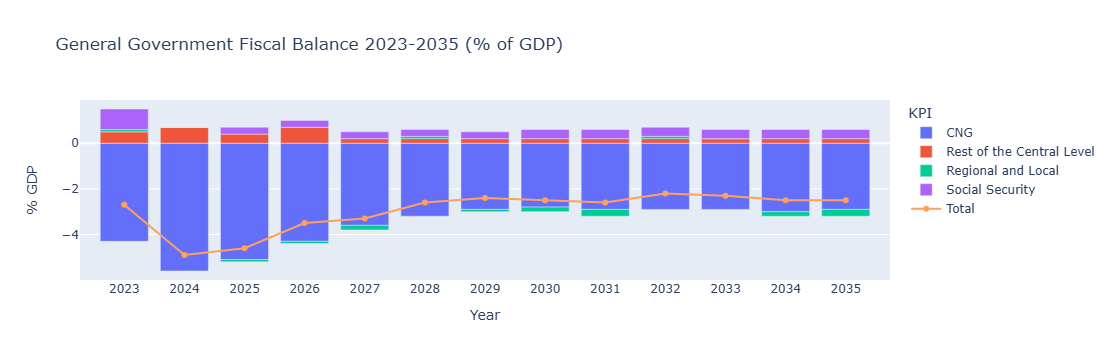

In [15]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

df = data_g312_graph.copy()

fig = px.bar(df[df.KPI != "General Government"], x="Year", y="% GDP", color="KPI", title="General Government Fiscal Balance 2023-2035 (% of GDP)")
fig.add_trace(go.Scatter(x=df[df.KPI == "General Government"]['Year'], y=df[df.KPI == "General Government"]['% GDP'], name="Total"))
fig.show()

fig.write_html('./G312.html')

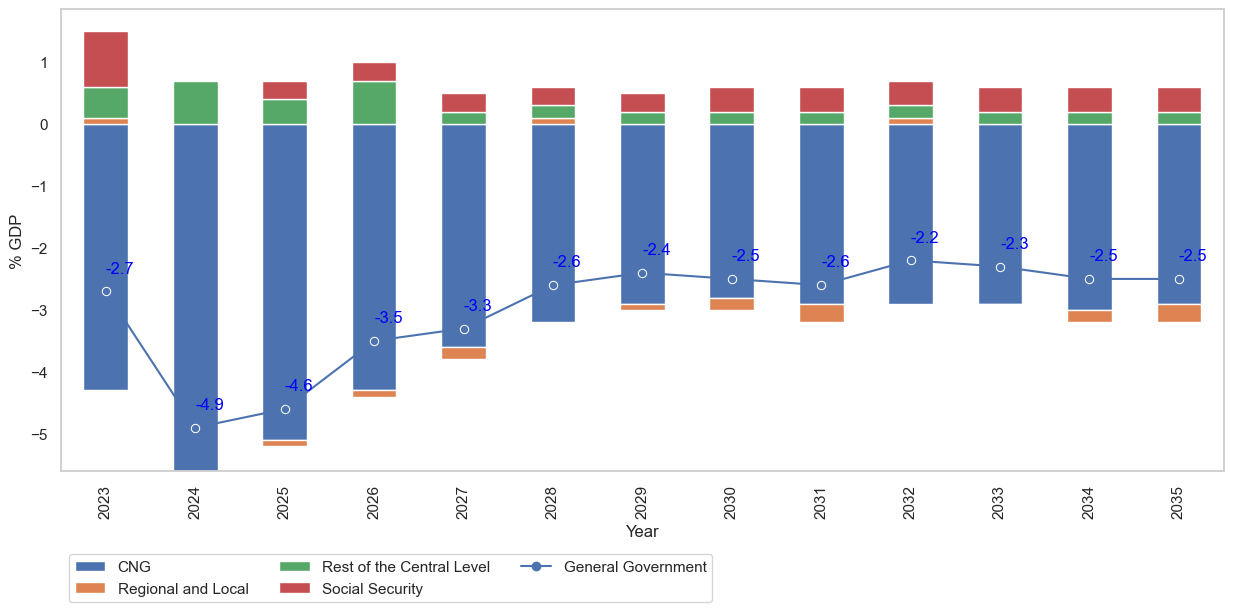

In [12]:
df = data_g312_graph[data_g312_graph.KPI != "General Government"].pivot(index='Year', columns='KPI', values='% GDP')

fig, ax = plt.subplots(figsize = plotsize)

df.plot(kind='bar', stacked=True, ax=ax)

sns.lineplot(x="Year",  y="% GDP", data=data_g312_graph[data_g312_graph.KPI == "General Government"], color="b", ax=ax, marker='o')
legend_line_plot = mlines.Line2D([], [], color="b", label="General Government", marker='o')

df_linea = data_g312_graph[data_g312_graph.KPI == "General Government"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a % GDP from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y+.3, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line

handles, labels = ax.get_legend_handles_labels()
handles.extend([legend_line_plot])

ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0, -0.3), ncols = 3)
ax.grid(False)

